102967424/102967424 [==============================] - 0s 0us/step


2024-08-10 13:58:12.883626: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8200


  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  50%|█████     | 1/2 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 3it [00:33, 16.99s/it]               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


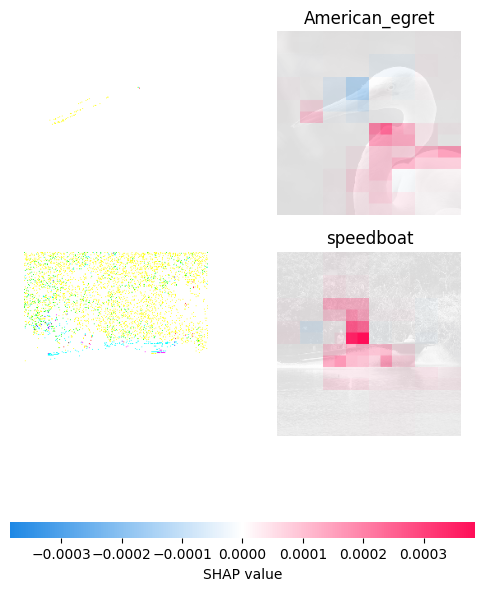

In [33]:
import json

from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

import shap

# load pre-trained model and choose two images to explain
model = ResNet50(weights="imagenet")


def f(X):
    tmp = X.copy()
    preprocess_input(tmp)
    return model(tmp)


X, y = shap.datasets.imagenet50()

# load the ImageNet class names as a vectorized mapping function from ids to names
url = "https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json"
with open(shap.datasets.cache(url)) as file:
    class_names = [v[1] for v in json.load(file).values()]

# define a masker that is used to mask out partitions of the input image, this one uses a blurred background
masker = shap.maskers.Image("inpaint_telea", X[0].shape)

# By default the Partition explainer is used for all  partition explainer
explainer = shap.Explainer(f, masker, output_names=class_names)

# here we use 500 evaluations of the underlying model to estimate the SHAP values
shap_values = explainer(X[1:3], max_evals=500, batch_size=50, outputs=shap.Explanation.argsort.flip[:1])
shap.image_plot(shap_values)

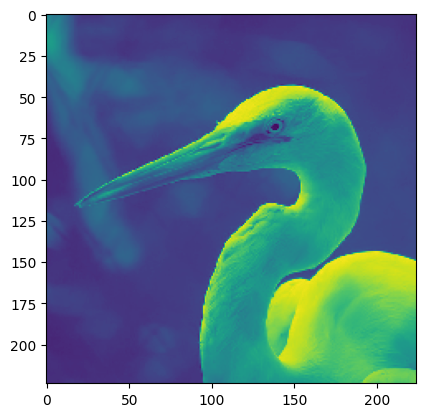

In [54]:
import matplotlib.pyplot as plt
import cv2

img=cv2.cvtColor(X[1],cv2.COLOR_BGR2GRAY)
# Show the plot
plt.imshow(img)

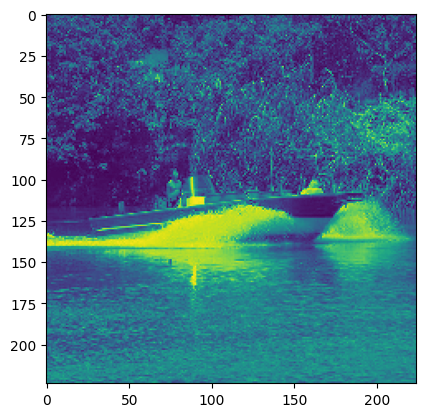

In [55]:
import matplotlib.pyplot as plt
import cv2

img=cv2.cvtColor(X[2],cv2.COLOR_BGR2GRAY)
# Show the plot
plt.imshow(img)